## Setup and Config

In [1]:
import urllib.request
from lxml import html
import json
import pandas as pd
import requests
import numpy as np

In [2]:
###Get api address for dataset

#ITE
id0 = '0e005227-6e99-4a99-b608-d8f1c1606967'
#Poly
id1 = 'f358cf0d-61fa-4eeb-93a2-1eca971cf1a4'
#ITE Grad
id2 = '4e35400a-5a45-4483-9363-df01fa59584a'

In [119]:
#defining header
header= {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) ' 
      'AppleWebKit/537.11 (KHTML, like Gecko) '
      'Chrome/23.0.1271.64 Safari/537.11',
      'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
##      'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
##      'Accept-Encoding': 'none',
##      'Accept-Language': 'en-US,en;q=0.8',
      'Connection': 'keep-alive'}

#the URL where you are requesting at
url='https://data.gov.sg/api/action/datastore_search?resource_id='+id2+'&limit=1000'

req = urllib.request.Request(url=url, headers=header) 
page = urllib.request.urlopen(req)
text=page.read().decode()

try:
        js = json.loads(text)
except:
        js = None

## Getting Data to Dataframe

In [120]:
#get records from results into dataframe

df=pd.DataFrame.from_dict(js['result']['records'], orient='columns')

In [121]:
df

,gender,_id,graduate_count,nmc_course_level,year
0,Male,1,35,Engineering: Diploma,2011
1,Male,2,1413,Engineering: Higher NITEC,2011
2,Male,3,3148,Engineering: NITEC,2011
3,Male,4,320,Info-Communications Technology: Higher NITEC,2011
4,Male,5,714,Info-Communications Technology: NITEC,2011
...,...,...,...,...,...
123,Female,124,265,Info-Communications Technology: Higher NITEC,2018
124,Female,125,338,Info-Communications Technology: NITEC,2018
125,Female,126,7,Business & Services: Diploma,2018
126,Female,127,1291,Business & Services: Higher NITEC,2018


In [122]:
#ETL
df.drop(['_id'],axis=1,inplace=True)
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(drop = True)
try:
    df.rename(columns={"nmc_course_level": "course", "gender": "sex", "graduate_count": "graduates"},inplace=True)
except:
    print('ok')
    
df = df.reindex(columns=['year','sex','course','graduates'])
df[['year','graduates']]=df[['year','graduates']].apply(pd.to_numeric, errors='coerce')

In [123]:
df_eng = df[df['course'].str.contains('Engineering')]

In [124]:
###convert MF and F to Male and Female 

def cl_gender(x):
    if x =='Female'or x=='Male':
        return x
    elif x=='MF':
        return 'Male'
    elif x =='F':
        return 'Female'
    else:
        return 'NA'
        
    


df_eng['sex'] = df_eng['sex'].apply(cl_gender)

<ipython-input-124-07ed0595ff0d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['sex'] = df_eng['sex'].apply(cl_gender)


## Visualization

In [125]:
# Import seaborn and matplotlib with matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
df_eng.sort_values(by=['year'],inplace=True)

<ipython-input-126-9ea97032a82e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng.sort_values(by=['year'],inplace=True)


In [127]:
course_list = df_eng['course'].unique()

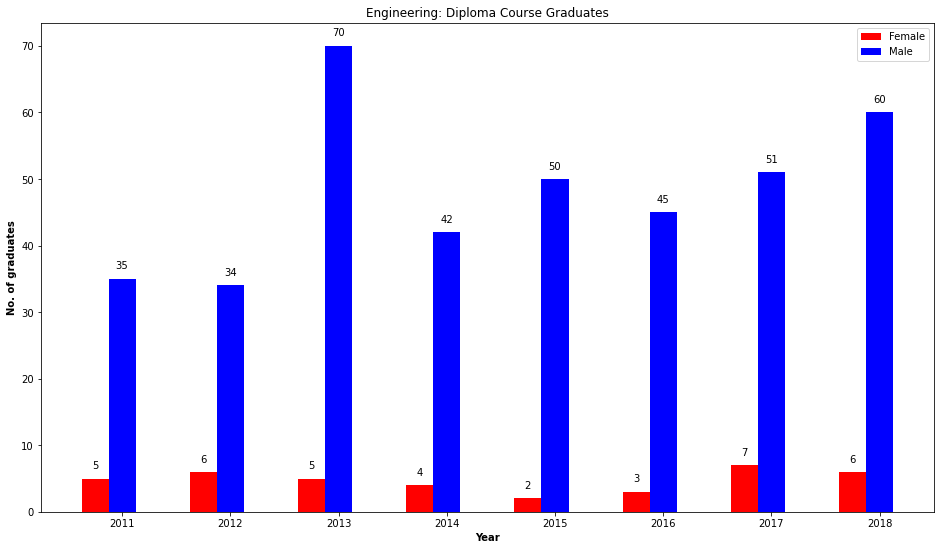

In [128]:
courseno = 0

# set width of bar
barWidth = 0.25
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# set height of bar
F = df_eng[(df_eng['sex']=='Female') & (df_eng['course']==course_list[courseno])]['graduates']
MF = df_eng[(df_eng['sex']=='Male') & (df_eng['course']==course_list[courseno])]['graduates']


# Set position of bar on X axis
br1 = np.arange(len(F))
br2 = [x + barWidth for x in br1]

# Set X year label
Y = df_eng[(df_eng['sex']=='Female') & (df_eng['course']==course_list[courseno])]['year']

# Make the plot
plt.bar(br1, F, color ='r', width = barWidth,
        label ='Female')
plt.bar(br2, MF, color ='b', width = barWidth,
        label ='Male')


# Add annotation to bars

for x,y in zip(br1,F):

    label = "{:d}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for x,y in zip(br2,MF):

    label = "{:d}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Adding Xticks
plt.xlabel("Year",fontweight ='bold')
plt.ylabel("No. of graduates",fontweight ='bold' )
plt.title(course_list[courseno]+" Course Graduates")
plt.xticks([r + barWidth for r in range(len(F))],Y)
 
plt.legend()
plt.show()






[]

In [8]:
df

,year,sex,course,intake,enrolment,graduates
0,2017,MF,Design & Media,967,1862,889
1,2017,F,Design & Media,486,921,440
2,2017,MF,Engineering,4685,8643,3805
3,2017,F,Engineering,676,1228,530
4,2017,MF,Electronics & Infocomm Technology,3570,6531,3100
...,...,...,...,...,...,...
127,2016,F,Hospitality,319,602,291
128,2017,MF,Applied and Health Sciences,1342,2537,1059
129,2017,F,Applied and Health Sciences,850,1558,643
130,2017,MF,Business & Services,4344,7797,3496
